# **ENTRENAMIENTO**

**ONTENER INFORMACIÒN**

In [ ]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()
dataframe = pd.read_csv(io.BytesIO(uploaded["Data.csv"]))
dataframe.info()

Saving Data.csv to Data.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SITUACION LABORAL  1991 non-null   object
 1   RANGO              1991 non-null   object
 2   SEXO               1991 non-null   object
 3   EDAD               1991 non-null   int64 
 4   DEPARTAMENTO       1988 non-null   object
 5   PROVINCIA          1988 non-null   object
 6   DISTRITO           1988 non-null   object
 7   PROFESION          1517 non-null   object
 8   MARCA              1991 non-null   object
 9   MODELO             1991 non-null   object
 10  PLAZA              1991 non-null   object
 11  COLOR              1990 non-null   object
 12  CARROCERIA         1965 non-null   object
 13  ASIENTOS           1991 non-null   int64 
 14  USO                1991 non-null   object
 15  COT                1991 non-null   int64 
dtypes: int64(3), o

**PREPROCESAMIENTO DE DATOS**



```
# Tiene formato de código
```

*Limpieza de datos - Eliminar variables no utilizables*

In [ ]:
dataframe = dataframe.drop(columns=["DEPARTAMENTO"])
dataframe = dataframe.drop(columns=["PROVINCIA"])
dataframe = dataframe.drop(columns=["DISTRITO"])
dataframe = dataframe.drop(columns=["MARCA"])
dataframe = dataframe.drop(columns=["MODELO"])
dataframe = dataframe.drop(columns=["COLOR"])
dataframe = dataframe.drop(columns=["PLAZA"])
dataframe = dataframe.drop(columns=["CARROCERIA"])
dataframe['PROFESION'].fillna('SECUNDARIA', inplace=True)
dataframe = dataframe.dropna()

*Transformación de datos - Cambio a valores binarios*

In [ ]:
SITUACION_LABORAL = {"SITUACION LABORAL": {"DEPENDIENTE":1,"INDEPENDIENTE":0,"INFORMAL":0}}
RANGO = {"RANGO": {"A":1,"B":1,"C":1,"D":0,"E":0,"RURAL":0}}
SEXO = {"SEXO": {"MASCULINO":1,"FEMENINO":0}}

dataframe.replace(SITUACION_LABORAL, inplace = True)
dataframe.replace(RANGO, inplace = True)
dataframe.replace(SEXO, inplace = True)
dataframe['ASIENTOS'] = dataframe['ASIENTOS'].apply(lambda x: 1 if x <= 5 else 0)
dataframe['EDAD'] = dataframe['EDAD'].apply(lambda x: 1 if x <= 30 else 0)
dataframe['USO'] = dataframe['USO'].apply(lambda x: 1 if x == "PARTICULAR" else 0)
dataframe['PROFESION'] = dataframe['PROFESION'].apply(lambda x: 0 if x == "SECUNDARIA" else 1)

dataframe.describe()

,SITUACION LABORAL,RANGO,SEXO,EDAD,PROFESION,ASIENTOS,USO,COT
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,0.546459,0.895028,0.532898,0.839779,0.761929,0.866399,0.938724,0.557007
std,0.497962,0.306595,0.499042,0.366903,0.426010,0.340309,0.239896,0.496864
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**ALGORITMOS**

*Librerias*

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

*Eje X e Y*

In [ ]:
X = dataframe[['SITUACION LABORAL', 'RANGO', 'SEXO','EDAD','PROFESION', 'ASIENTOS', 'USO']]
y = dataframe['COT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*REGRESIÓN LOGISTICA*

In [ ]:
modelLogisticRegression = linear_model.LogisticRegression()
modelLogisticRegression.fit(X_train,y_train)
y_pred_logistic = modelLogisticRegression.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_logistic)
print("Precisión del modelo:", accuracy_LR)
print(classification_report(y_test, y_pred_logistic))

Precisión del modelo: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.79      0.65      0.71       182
           1       0.74      0.86      0.80       217

    accuracy                           0.76       399
   macro avg       0.77      0.75      0.75       399
weighted avg       0.77      0.76      0.76       399



In [ ]:
confusion_matrix(y_test,y_pred_logistic)

array([[118,  64],
       [ 31, 186]])

In [ ]:
coefficients = modelLogisticRegression.coef_[0]
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df)

             Feature  Coefficient  Abs_Coefficient
1              RANGO     1.934695         1.934695
0  SITUACION LABORAL     1.819205         1.819205
4          PROFESION     1.466964         1.466964
5           ASIENTOS     1.031250         1.031250
2               SEXO    -0.334947         0.334947
6                USO    -0.109452         0.109452
3               EDAD     0.059586         0.059586


*ARBOL DE DECISION*

In [ ]:
modelDecisionTree = DecisionTreeClassifier()
modelDecisionTree.fit(X_train, y_train)
y_pred_decision_tree = modelDecisionTree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_decision_tree)
print("Precisión del modelo:", accuracy_DT)
print(classification_report(y_test, y_pred_decision_tree))

Precisión del modelo: 0.8195488721804511
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       182
           1       0.90      0.75      0.82       217

    accuracy                           0.82       399
   macro avg       0.83      0.83      0.82       399
weighted avg       0.83      0.82      0.82       399



In [ ]:
confusion_matrix(y_test,y_pred_decision_tree)

array([[164,  18],
       [ 54, 163]])

In [ ]:
importances = modelDecisionTree.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature  Importance
0  SITUACION LABORAL    0.448094
4          PROFESION    0.220882
1              RANGO    0.209095
5           ASIENTOS    0.065936
2               SEXO    0.025950
3               EDAD    0.016912
6                USO    0.013131


*BOSQUE ALEATORIO*

In [ ]:
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
modelRandomForest.fit(X_train, y_train)
y_pred_random_forest = modelRandomForest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_random_forest)
print("Precisión del modelo:", accuracy_RF)
print(classification_report(y_test, y_pred_random_forest))

Precisión del modelo: 0.8145363408521303
              precision    recall  f1-score   support

           0       0.75      0.89      0.81       182
           1       0.89      0.75      0.81       217

    accuracy                           0.81       399
   macro avg       0.82      0.82      0.81       399
weighted avg       0.83      0.81      0.81       399



In [ ]:
confusion_matrix(y_test,y_pred_random_forest)

array([[162,  20],
       [ 54, 163]])

In [ ]:
importances = modelRandomForest.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

             Feature  Importance
0  SITUACION LABORAL    0.428348
4          PROFESION    0.241611
1              RANGO    0.196476
5           ASIENTOS    0.060184
2               SEXO    0.028827
3               EDAD    0.023631
6                USO    0.020922


# **RESULTADO**

**MOSTRAR RESULTADOS**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [ ]:
y_pred_logistic = modelLogisticRegression.predict_proba(X_test)[:, 1]
y_pred_decision_tree = modelDecisionTree.predict_proba(X_test)[:, 1]
y_pred_random_forest = modelRandomForest.predict_proba(X_test)[:, 1]

In [ ]:
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_pred_random_forest)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_pred_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

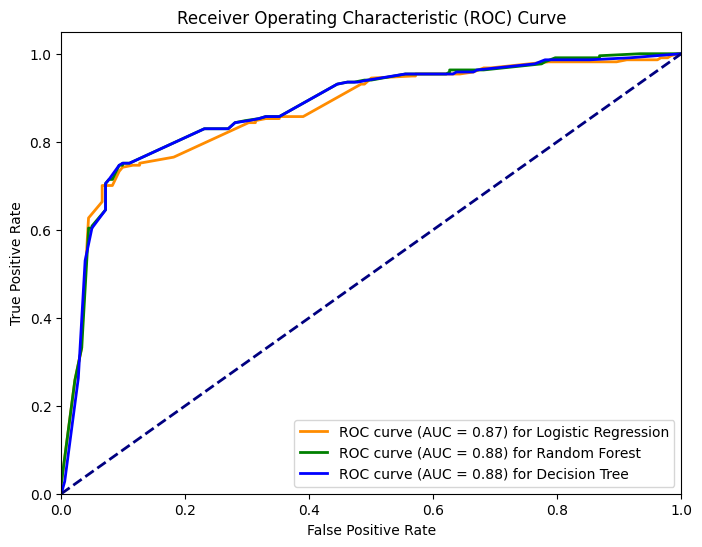

In [ ]:
plt.figure(figsize=(8, 6))

plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_logistic:.2f}) for Logistic Regression')
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc_random_forest:.2f}) for Random Forest')
plt.plot(fpr_decision_tree, tpr_decision_tree, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_decision_tree:.2f}) for Decision Tree')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pickle

uploaded = files.upload()
newdataset = pd.read_csv(io.BytesIO(uploaded["DataCustomer.csv"]))

In [ ]:
newdataset = newdataset.drop(columns=["DEPARTAMENTO"])
newdataset = newdataset.drop(columns=["PROVINCIA"])
newdataset = newdataset.drop(columns=["DISTRITO"])
newdataset = newdataset.drop(columns=["MARCA"])
newdataset = newdataset.drop(columns=["MODELO"])
newdataset = newdataset.drop(columns=["COLOR"])
newdataset = newdataset.drop(columns=["PLAZA"])
newdataset = newdataset.drop(columns=["CARROCERIA"])
newdataset['PROFESION'].fillna('SECUNDARIA', inplace=True)

newdataset = newdataset.dropna()

SITUACION_LABORAL = {"SITUACION LABORAL": {"DEPENDIENTE":1,"INDEPENDIENTE":0,"INFORMAL":0}}
RANGO = {"RANGO": {"A":1,"B":1,"C":1,"D":0,"E":0,"RURAL":0}}
SEXO = {"SEXO": {"MASCULINO":1,"FEMENINO":0}}

newdataset.replace(SITUACION_LABORAL, inplace = True)
newdataset.replace(RANGO, inplace = True)
newdataset.replace(SEXO, inplace = True)
newdataset['ASIENTOS'] = newdataset['ASIENTOS'].apply(lambda x: 1 if x <= 5 else 0)
newdataset['EDAD'] = newdataset['EDAD'].apply(lambda x: 1 if x <= 30 else 0)
newdataset['USO'] = newdataset['USO'].apply(lambda x: 1 if x == "PARTICULAR" else 0)
newdataset['PROFESION'] = newdataset['PROFESION'].apply(lambda x: 0 if x == "SECUNDARIA" else 1)

newdataset.describe()

<ipython-input-23-37a4541f57dd>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset.replace(SITUACION_LABORAL, inplace = True)
<ipython-input-23-37a4541f57dd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdataset.replace(RANGO, inplace = True)
<ipython-input-23-37a4541f57dd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,SITUACION LABORAL,RANGO,SEXO,EDAD,PROFESION,ASIENTOS,USO
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.733184,0.843797,0.600897,0.809417,0.789238,0.915546,0.913303
std,0.442461,0.363184,0.489897,0.392908,0.408002,0.278172,0.281495
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
predicciones = modelRandomForest.predict(newdataset)
newdataset['PREDICT'] = predicciones
df_precision = pd.DataFrame({'Precision': [accuracy_RF]})
resultado_final = pd.concat([newdataset, df_precision], axis=1)
resultado_final.to_excel('result.xlsx', index=False)
files.download('result.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>